# **Image Generation with Pre-trained Models**

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

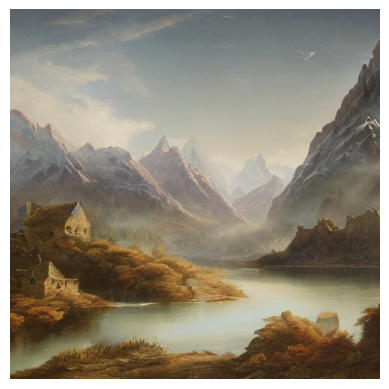

In [ ]:
# Install necessary libraries
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install diffusers
!pip install matplotlib

# Import necessary libraries
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Function to load the model
def load_model(model_id):
    # Load the Stable Diffusion model
    pipeline = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
    return pipeline

# Function to generate an image
def generate_image(pipeline, prompt):
    # Generate an image from the given prompt
    with torch.autocast("cuda"):
        image = pipeline(prompt).images[0]
    return image

# Load the Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipeline = load_model(model_id)

# Define the prompt for image generation
prompt = "A fantasy landscape with mountains and a river"

# Generate an image with the chosen model
image = generate_image(pipeline, prompt)

# Display the generated image using matplotlib
plt.imshow(image)
plt.axis("off")  # Hide the axis
plt.show()  # Show the image

# Save the generated image
image.save("generated_image.png")  # Save the image as a PNG file
